In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn import metrics
import nltk
import string
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

#Reading imdb reviews data
dfTrainP=pd.read_csv(r'imdbTrain.pos')
dfTrainN=pd.read_csv(r'imdbTrain.neg')
dfTestP=pd.read_csv(r'imdbTest.pos')
dfTestN=pd.read_csv(r'imdbTest.neg')
pd.set_option('display.max_colwidth', None)
print(len(dfTrainP),len(dfTrainN),len(dfTestP),len(dfTestN))

12325 12362 12338 12368


In [2]:
#reading reviews data
df2P=pd.read_csv(r'reviews.pos',names=["Text"])
df2N=pd.read_csv(r'reviews.neg',names=["Text"])

df2P["Sentiment"] = 1
df2N["Sentiment"] = 0
df2P_train, df2P_test=train_test_split( df2P, test_size=0.2)
df2N_train, df2N_test=train_test_split( df2N, test_size=0.2)
df2P.head()

,Text,Sentiment
0,fena değil paraya göre iyi.,1
1,ürün kaliteli ve çok kullanışlı kargo ya verilmesi ve elime çabuk ulaşması da gayet başarılı idi,1
2,fiyat-performans karşılaştırması yaptığınızda gayet iyi bir ürün. en önemlisi ısınma yapmıyor.,1
3,bu fiyata çok iyi,1
4,fiyat ve performans olarak gayet iyi,1


In [3]:
dfTrainP = dfTrainP.rename(columns={'0': 'Text'})
dfTrainN = dfTrainN.rename(columns={'0': 'Text'})
dfTestP = dfTestP.rename(columns={'0': 'Text'})
dfTestN = dfTestN.rename(columns={'0': 'Text'})

In [4]:
dfTrainP["Sentiment"] = 1
dfTrainN["Sentiment"] = 0
dfTestP["Sentiment"] = 1
dfTestN["Sentiment"] = 0

#building training, test sets //different type of sets used for different models

dfTrain= pd.concat([dfTrainP ,dfTrainN])
dfTest= pd.concat([dfTestP ,dfTestN])
#dfTrain= pd.concat([dfTrainP ,dfTrainN, df2P_train, df2N_train])
#dfTest= pd.concat([dfTestP ,dfTestN,df2P_test,df2N_test])
dfTrain["type"]=dfTrain['Text'].apply(type)
dfTest["type"]=dfTest['Text'].apply(type)

dfTrain=dfTrain[dfTrain["type"]!=float]
dfTest=dfTest[dfTest["type"]!=float]
#dfTrain=shuffle(dfTrain)
#dfTest=shuffle(dfTest)
#df=pd.concat([dfTrain ,dfTest])
print(len(dfTrain),len(dfTest))

24687 24705


In [5]:
##dfTrain, dfTest=train_test_split(df,test_size=0.2)
##print(dfTrain.Sentiment.value_counts())
##print(dfTest.Sentiment.value_counts())
dfTrain=shuffle(dfTrain)
dfTest=shuffle(dfTest)
print(dfTrain["Text"].apply(type).value_counts())
print(dfTest["Text"].apply(type).value_counts())

<class 'str'>    24687
Name: Text, dtype: int64
<class 'str'>    24705
Name: Text, dtype: int64


In [6]:
# split dataset
X_train = dfTrain['Text'].copy()
X_test = dfTest['Text'].copy()
y_train = dfTrain['Sentiment']
y_test = dfTest['Sentiment']

In [7]:
WPT = nltk.WordPunctTokenizer()
stop_word_list = nltk.corpus.stopwords.words('turkish')
print(stop_word_list)

['acaba', 'ama', 'aslında', 'az', 'bazı', 'belki', 'biri', 'birkaç', 'birşey', 'biz', 'bu', 'çok', 'çünkü', 'da', 'daha', 'de', 'defa', 'diye', 'eğer', 'en', 'gibi', 'hem', 'hep', 'hepsi', 'her', 'hiç', 'için', 'ile', 'ise', 'kez', 'ki', 'kim', 'mı', 'mu', 'mü', 'nasıl', 'ne', 'neden', 'nerde', 'nerede', 'nereye', 'niçin', 'niye', 'o', 'sanki', 'şey', 'siz', 'şu', 'tüm', 've', 'veya', 'ya', 'yani']


In [8]:
def text_preprocess(text): #text preprocessing, removing punctuations and stopwords
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stop_word_list]
    return " ".join(text)

X_train = X_train.apply(text_preprocess)
X_test = X_test.apply(text_preprocess)

In [9]:
# tf idf vectors
vect = TfidfVectorizer(encoding ='utf-8').fit(X_train) # fit and transform
X_train_vectorized = vect.transform(X_train)

# import LogisticRegression
lr = LogisticRegression()

# fitting model
lr.fit(X_train_vectorized, y_train)

LogisticRegression()

In [10]:
# prediction
predictions = lr.predict(vect.transform(X_test))
# accuracy 
print('Accuracy: ',metrics.accuracy_score(y_test, predictions))
print('Precision Macro:',metrics.precision_score(y_test, predictions, average='macro'))
print('Precision Micro:',metrics.precision_score(y_test, predictions, average='micro'))
print('Recall Macro:',metrics.recall_score(y_test, predictions, average='macro'))
print('Recall Mİcro:',metrics.recall_score(y_test, predictions, average='micro'))
print('F1-Macro:', metrics.f1_score(y_test, predictions,average="macro"))
print('F1-Micro:', metrics.f1_score(y_test, predictions,average="micro"))
print('AUC: ', metrics.roc_auc_score(y_test, predictions))

Accuracy:  0.8711192066383323
Precision Macro: 0.8711449138555745
Precision Micro: 0.8711192066383323
Recall Macro: 0.8711241606478308
Recall Mİcro: 0.8711192066383323
F1-Macro: 0.8711178887545675
F1-Micro: 0.8711192066383323
AUC:  0.8711241606478308


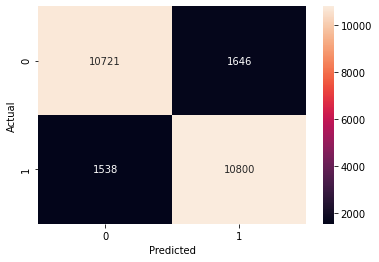

In [11]:
data = {'y_test':    y_test,
        'y_pred': predictions
        }
dfCMplt = pd.DataFrame(data, columns=['y_test','y_pred'])
confusion_matrix = pd.crosstab(dfCMplt['y_test'], dfCMplt['y_pred'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True,fmt='g')
plt.show()

In [15]:
svc=LinearSVC()

# fitting model
svc.fit(X_train_vectorized, y_train)

# prediction
predictions = svc.predict(vect.transform(X_test))
# accuracy 
print('Accuracy: ',metrics.accuracy_score(y_test, predictions))
print('Precision Macro:',metrics.precision_score(y_test, predictions, average='macro'))
print('Precision Micro:',metrics.precision_score(y_test, predictions, average='micro'))
print('Recall Macro:',metrics.recall_score(y_test, predictions, average='macro'))
print('Recall Mİcro:',metrics.recall_score(y_test, predictions, average='micro'))
print('F1-Macro:', metrics.f1_score(y_test, predictions,average="macro"))
print('F1-Micro:', metrics.f1_score(y_test, predictions,average="micro"))
print('AUC: ', metrics.roc_auc_score(y_test, predictions))

Accuracy:  0.8710382513661202
Precision Macro: 0.8711340830659425
Precision Micro: 0.8710382513661202
Recall Macro: 0.871028855795317
Recall Mİcro: 0.8710382513661202
F1-Macro: 0.8710277429730406
F1-Micro: 0.8710382513661202
AUC:  0.8710288557953169


(24705,)
(24705,)


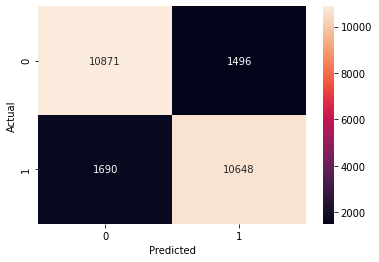

In [16]:
print(y_test.shape)
print(predictions.shape)
data = {'y_test':    y_test,
        'y_pred': predictions
        }
dfCMplt = pd.DataFrame(data, columns=['y_test','y_pred'])
confusion_matrix = pd.crosstab(dfCMplt['y_test'], dfCMplt['y_pred'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True,fmt='g')
plt.show()

**CountVectorizer**



LR-
Accuracy:  0.90925336460602
AUC:  0.8435277022818786
F1-Macro: 0.8589626861909924
F1-Micro: 0.90925336460602

LinearSVC-
Accuracy:  0.8907968950689674
AUC:  0.8238902035282154
F1-Macro: 0.8330934049596225
F1-Micro: 0.8907968950689674

**TFIDF**


LR-
Accuracy:  0.9085375218150087
AUC:  0.829419835051312
F1-Macro: 0.8536246927987683
F1-Micro: 0.9085375218150087

LinearSVC-
Accuracy:  0.912349040139616
AUC:  0.848201100021541
F1-Macro: 0.8637993885466271
F1-Micro: 0.912349040139616

**TFIDF SadeceIMDB**

LR-
Accuracy:  0.8711192066383323
AUC:  0.8711241606478308
F1-Macro: 0.8711178887545675
F1-Micro: 0.8711192066383323


LinearSVC-
Accuracy:  0.8710382513661202
AUC:  0.8710288557953169
F1-Macro: 0.8710277429730406
F1-Micro: 0.8710382513661202

**TFIDF SadeceIMDB test_size=0.2**

LR-
Accuracy:  0.8802510375544084
AUC:  0.8803575447069225
F1-Macro: 0.8802507970612468
F1-Micro: 0.8802510375544084

LinearSVC-
Accuracy:  0.8870331005162466
AUC:  0.8870709715606299
F1-Macro: 0.8870298489734263
F1-Micro: 0.8870331005162467

In [16]:
def readFile(fileName):
    file = open(fileName,encoding="utf-8")
    line = file.read()
    file.close()
    return line

In [35]:
#https://stackoverflow.com/questions/57000903/what-is-the-fastest-and-most-efficient-way-to-append-rows-to-a-dataframe
from tqdm import tqdm

directory = r'..\KonusmaDB'

dictinary_list = []
for filename in tqdm(os.listdir(directory)):
    speech=readFile(os.path.join(directory, filename))
    dictionary_data = {'ID': filename.split(".txt")[0], 'Sentiment': lr.predict(vect.transform([speech]))[0]}
    dictinary_list.append(dictionary_data)

dfKonusma = pd.DataFrame.from_dict(dictinary_list)

#for filename in tqdm(os.listdir(directory)):
#    speech=readFile(os.path.join(directory, filename))
#    dfKonusma = dfKonusma.append({'ID': filename.split(".txt")[0], 'Sentiment': lr.predict(vect.transform([speech]))[0]}, ignore_index=True)

100%|██████████████████████████████████████████████████████████████████████| 1085702/1085702 [3:50:33<00:00, 78.48it/s]


In [36]:
#tbmm sentiment classification details
print(dfKonusma.head())
print(dfKonusma.Sentiment.value_counts())

      ID  Sentiment
0      1          1
1     10          0
2    100          0
3   1000          1
4  10000          0
0    584032
1    501670
Name: Sentiment, dtype: int64


In [37]:
dfKonusma.to_csv("./sentiments.csv",index=False,sep=",")

In [38]:
print(len(dfKonusma),len(os.listdir(directory)))

1085702 1085702


In [21]:
deneme="""Türkiye Taşkömürü Kurumunda azalan işçi sayısı Kurumun geleceğini tehlikeye sokmakla kalmayıp madenlerde kaza riskini artırmaktadır. 17 Temmuz tarihinde Kurumun Armutçuk Taşkömürü İşletme Müessesinde meydana gelen göçük nedeniyle 25 yaşındaki madencimiz Yunus Oku hayatını kaybederken bugün de Üzülmez Taşkömürü İşletme Müessesinde 29 yaşındaki Fatih Kafkas isimli maden işçimiz aynı şekilde can vermiştir. Bir hafta içerisinde peş peşe gerçekleşen bu iki kaza âdeta göz göre göre gelmiştir. Sayıştay raporlarında, Kurumda yeterli sayıda işçi tertip edilmemesinin hem üretim kayıplarına hem de iş kazalarına yol açtığı açıkça ifade edilmiştir. İşçi açığının giderilmediği TTK’de, Kurumun geleceği ve işçilerin hayatları karartılmaktadır. TTK’ye acil olarak…"""
svc.predict(vect.transform([deneme]))[0]

0

In [27]:
svc.predict(vect.transform(["""Böyle kapsamlı geldik çünkü Komisyonda konuşacağımızı, katma değer vergisiyle ilgili bir kanunu görüşeceğimizi düşünüyorduk, burada torba kanunu görüşüyoruz. Onun için, hazırlık yapmadan kürsüye çıkmış olduk, biraz da kalabalık geldik. Sayın Başkanım, değerli arkadaşlarım; hepinizi saygıyla selamlıyorum. Sayın Başkanım, sizi tebrik ediyorum, hayırlı uğurlu olsun, başarılar diliyorum.""","asdas"]))

array([1, 0], dtype=int64)

In [34]:
del local_vars

0    6059
1    3940